In [44]:
import cv2
import matplotlib.pyplot as plt 

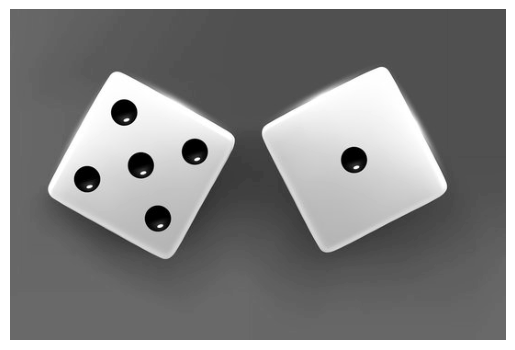

In [45]:
image = cv2.imread("input/2dice.png" , cv2.IMREAD_GRAYSCALE)
plt.imshow(image  , cmap="gray")
plt.axis("off")
plt.show()

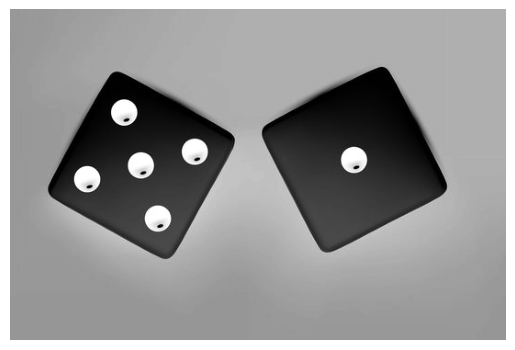

In [46]:
inv = 255 - image
plt.imshow(inv  , cmap="gray")
plt.axis("off")
plt.show()

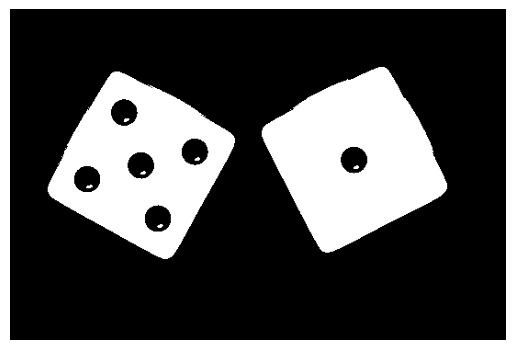

In [47]:
_ , thresh = cv2.threshold(image , 127 , 255  , cv2.THRESH_BINARY)
plt.imshow(thresh , cmap="gray")
plt.axis("off")
plt.show()

[[[14 -1  1 -1]
  [ 3 -1  2  0]
  [-1 -1 -1  1]
  [ 5  1  4  0]
  [-1 -1 -1  3]
  [ 7  3  6  0]
  [-1 -1 -1  5]
  [ 9  5  8  0]
  [-1 -1 -1  7]
  [10  7 -1  0]
  [12  9 11  0]
  [-1 -1 -1 10]
  [13 10 -1  0]
  [-1 12 -1  0]
  [-1  0 15 -1]
  [-1 -1 16 14]
  [-1 -1 -1 15]]]


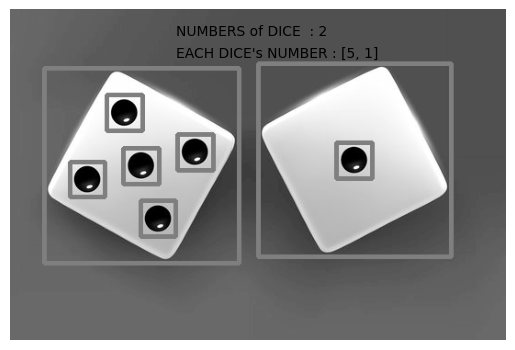

In [48]:
contours , hierarchy = cv2.findContours(thresh , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE) # list contour ha ro mide 
print(hierarchy)
dice = image.copy()
count = 0
temp = []
array=[]
number_of_dices = 0 
for contour in contours :
    if cv2.contourArea(contour) > 100 :
        x , y , w , h = cv2.boundingRect(contour)
        cv2.rectangle(dice , (x-4,y-4) , (x+w+4 , y+h+4) , (127 , 127 , 127) , 3)
        count+=1

for i in range(len(hierarchy[0])):
        array.append(hierarchy[0][i][3])
        #print(hierarchy[0][i][3])
#print(array)       
#print(len(array))

for i in range(len(array)):
     if array[i] == -1 :
          number_of_dices +=1
#print(number_of_dices)


number_of_inside_bounding_box = 0
for i in range(len(array)-1)   :     
        
    if hierarchy [0][i][3] > 0 :
        number_of_inside_bounding_box += 1 
    temp.append(number_of_inside_bounding_box)

    if hierarchy [0][i][3] == -1 and  i!= 0 :        
        number_of_inside_bounding_box = 0

plt.axis("off")  
plt.text(image.shape[0] /2 , image.shape[0]/13 , f"NUMBERS of DICE  : {number_of_dices} " )
plt.text(image.shape[0] /2 , image.shape[0]/7 , f"EACH DICE's NUMBER : {temp[-2:]} " )
plt.imshow(dice , cmap="gray") 
plt.show()    